In [1]:
import pandas as pd
import numpy as np

In [2]:
client_df=pd.read_csv("/Users/jaszeng/Desktop/Metis/Classification/application_train.csv")

In [3]:
client_df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
105490,222408,0,Revolving loans,F,Y,N,1,180000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
186444,316143,0,Cash loans,F,N,N,0,180000.0,585000.0,28143.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
123379,243076,0,Cash loans,F,N,Y,0,225000.0,1027327.5,40873.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
306502,455110,0,Cash loans,F,N,Y,0,67500.0,675000.0,19867.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3630,104237,0,Cash loans,F,N,Y,1,225000.0,640080.0,31261.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
client_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
client_df.shape

(307511, 122)

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


First, delete columns with too many null values, I have 300,000 data, let's set the threshold to be 50,000 first. If null value of a feature exceeds 50,000, we delete this feature.

In [7]:
col_countna=client_df.isna().sum().sort_values(ascending=False)
nullcolumns=col_countna[col_countna>50000].index
len(nullcolumns)

51

In [8]:
client_df1=client_df.drop(columns=nullcolumns)
client_df1.shape

(307511, 71)

Next, We should replace float NA with mean, int NA with mode and object NA with mode

In [9]:
object_columns=[]
float_columns=[]
int_columns=[]
for i in client_df1.columns:
    if client_df1[i].dtypes=='object':
        object_columns.append(i)
    elif client_df1[i].dtypes=='float':
        float_columns.append(i)
    else:
        int_columns.append(i)

In [10]:
client_df1[float_columns]=client_df1[float_columns].fillna(client_df1[float_columns].mean())
client_df1[int_columns]=client_df1[int_columns].fillna(client_df1[int_columns].mode())
client_df1[object_columns]=client_df1[object_columns].fillna(client_df1[object_columns].mode())

In [11]:
client_df1.isna().sum().sort_values(ascending=False)

NAME_TYPE_SUITE               1292
SK_ID_CURR                       0
FLAG_DOCUMENT_10                 0
FLAG_DOCUMENT_8                  0
FLAG_DOCUMENT_7                  0
                              ... 
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
REG_REGION_NOT_LIVE_REGION       0
REG_REGION_NOT_WORK_REGION       0
AMT_REQ_CREDIT_BUREAU_YEAR       0
Length: 71, dtype: int64

In [12]:
client_df1['NAME_TYPE_SUITE']=client_df1['NAME_TYPE_SUITE'].fillna('Unaccompanied')

Then, deal with categorical value

In [13]:
client_df1.loc[:,object_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             307511 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 10  ORGANIZATION_TYPE           307511 non-null  object
dtypes: object(11)
memory usage: 25.8+ MB


In [14]:
client_df1.loc[:,object_columns].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

Here I delete the 'organization type' feature since this feature is too complicated, and it will not add value to model as the time it will consume. Also I delete 'weekday_appr_process_start' as this should not impact the model. Then, for categorical object columns that only have two groups, I change it to 0/1 dummy columns.

In [15]:
client_df1['FLAG_CASH_LOANS']=(client_df1['NAME_CONTRACT_TYPE']=='Cash loans') .astype(int)
client_df1['FLAG_OWN_CAR']=(client_df1['FLAG_OWN_CAR']=='Y') .astype(int)
client_df1['FLAG_OWN_REALTY']=(client_df1['FLAG_OWN_REALTY']=='Y') .astype(int)

Next, change gender into dummies

In [16]:
client_df1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [17]:
client_df1=client_df1[client_df1['CODE_GENDER']!='XNA']
client_df1['GENDER']=(client_df1['CODE_GENDER']=='F') .astype(int)

In [18]:
client_df1=client_df1.drop(columns=['CODE_GENDER','NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'])

Look at NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE, see if average default rate is largely different by categories

<AxesSubplot:xlabel='NAME_TYPE_SUITE'>

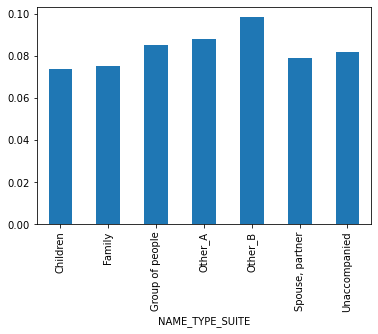

In [19]:
client_df1.groupby('NAME_TYPE_SUITE')['TARGET'].mean().plot(kind='bar')

<AxesSubplot:xlabel='NAME_INCOME_TYPE'>

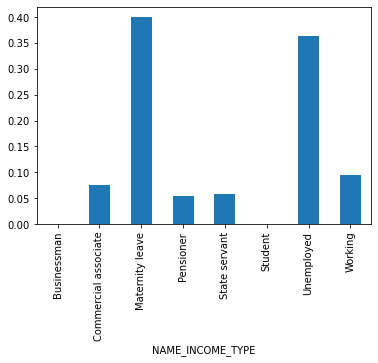

In [20]:
client_df1.groupby('NAME_INCOME_TYPE')['TARGET'].mean().plot(kind='bar')

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE'>

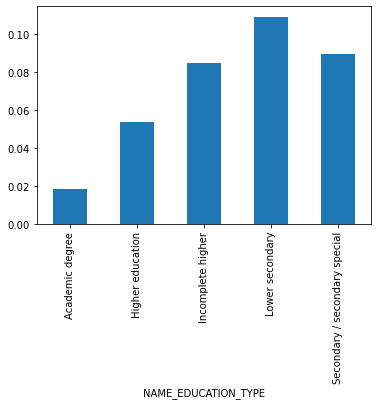

In [21]:
client_df1.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().plot(kind='bar')

<AxesSubplot:xlabel='NAME_FAMILY_STATUS'>

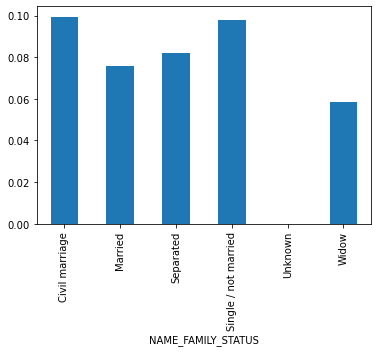

In [22]:
client_df1.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().plot(kind='bar')

<AxesSubplot:xlabel='NAME_HOUSING_TYPE'>

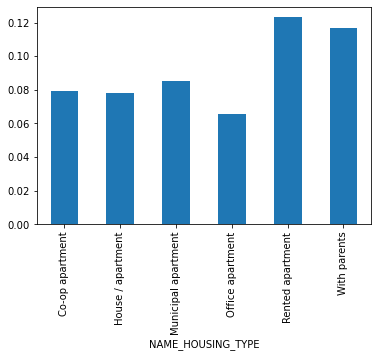

In [23]:
client_df1.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().plot(kind='bar')

## Observation: 

'NAME_TYPE_SUITE' doesn't seem to be an important feature

'NAME_INCOME_TYPE' = maternity leave or unemployed, looks to have obvious higher default rate

'NAME_EDUCATION_TYPE' default rate raised along group: 'academic degree' -> 'higher education' -> 'incomplete higher' -> 'secondary special' -> 'lower secondary'

'NAME_FAMILY_STATUS'='widow' seems to have lower default rate

'NAME_HOUSING_TYPE'= 'rented apartment' and 'with parents' seem to have higher default rate

In [25]:
client_df1['NAME_INCOME_TYPE'].loc[(client_df1['NAME_INCOME_TYPE']!='Maternity leave')&(client_df1['NAME_INCOME_TYPE']!='Unemployed')] = 'Others income type'
client_df1=pd.concat([client_df1,pd.get_dummies(client_df1['NAME_INCOME_TYPE'],drop_first=True)],axis=1)

In [26]:
client_df1['NAME_EDUCATION_TYPE'].loc[client_df1['NAME_EDUCATION_TYPE']=='Lower secondary'] = 1
client_df1['NAME_EDUCATION_TYPE'].loc[client_df1['NAME_EDUCATION_TYPE']=='Secondary / secondary special'] = 2
client_df1['NAME_EDUCATION_TYPE'].loc[client_df1['NAME_EDUCATION_TYPE']=='Incomplete higher'] = 3
client_df1['NAME_EDUCATION_TYPE'].loc[client_df1['NAME_EDUCATION_TYPE']=='Higher education'] = 4
client_df1['NAME_EDUCATION_TYPE'].loc[client_df1['NAME_EDUCATION_TYPE']=='Academic degree'] = 5
client_df1['NAME_EDUCATION_TYPE']=client_df1['NAME_EDUCATION_TYPE'].astype('int')

In [27]:
client_df1['FLAG_WIDOW']=(client_df1['NAME_FAMILY_STATUS']=='Widow').astype('int')

In [30]:
client_df1['NAME_HOUSING_TYPE'].loc[(client_df1['NAME_HOUSING_TYPE']!='Rented apartment')&(client_df1['NAME_HOUSING_TYPE']!='With parents')] = 'Others housing type'
client_df1=pd.concat([client_df1,pd.get_dummies(client_df1['NAME_HOUSING_TYPE'],drop_first=True)],axis=1)

In [31]:
client_df2=client_df1.drop(columns=['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])

In [34]:
client_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   FLAG_OWN_CAR                 307507 non-null  int64  
 3   FLAG_OWN_REALTY              307507 non-null  int64  
 4   CNT_CHILDREN                 307507 non-null  int64  
 5   AMT_INCOME_TOTAL             307507 non-null  float64
 6   AMT_CREDIT                   307507 non-null  float64
 7   AMT_ANNUITY                  307507 non-null  float64
 8   AMT_GOODS_PRICE              307507 non-null  float64
 9   NAME_EDUCATION_TYPE          307507 non-null  int64  
 10  REGION_POPULATION_RELATIVE   307507 non-null  float64
 11  DAYS_BIRTH                   307507 non-null  int64  
 12  DAYS_EMPLOYED                307507 non-null  int64  
 13 

In [33]:
client_df2['Others income type']=client_df2['Others income type'].astype('int')
client_df2['Unemployed']=client_df2['Unemployed'].astype('int')
client_df2['Rented apartment']=client_df2['Rented apartment'].astype('int')
client_df2['With parents']=client_df2['With parents'].astype('int')

Split data into train and test data and build a baseline model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
X=client_df2.drop(columns=['TARGET'])
Y=client_df2['TARGET']

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=222)

In [38]:
logit=LogisticRegression(max_iter=100000)
logit.fit(X_train,Y_train)
logit_pred=logit.predict(X_test)

In [39]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

In [40]:
print("accuracy: ",accuracy(Y_test, logit_pred))
print("precision: ",precision(Y_test, logit_pred))
print("recall: ",recall(Y_test, logit_pred))
print("F1: ", F1(Y_test,logit_pred))

accuracy:  0.9179213684107834
precision:  nan
recall:  0.0
F1:  nan


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_40595/3466243424.py:7: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fp)


In [41]:
logit_pred[logit_pred==1]

array([], dtype=int64)

In [43]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(random_state=42)

In [44]:
rforest.fit(X_train,Y_train)
rforest_pred=rforest.predict(X_test)

In [45]:
print("accuracy: ",accuracy(Y_test, rforest_pred))
print("precision: ",precision(Y_test, rforest_pred))
print("recall: ",recall(Y_test, rforest_pred))
print("F1: ", F1(Y_test,rforest_pred))

accuracy:  0.9179376280446164
precision:  0.6
recall:  0.0005942947702060222
F1:  0.001187413417771621


In [46]:
rforest_pred[rforest_pred==1]

array([1, 1, 1, 1, 1])

Since all model returns prediction of zero, I guess this is the result of destructive imbalance. I would first try to down-sample my train data set. keep 15,000 default clients and 15,000 good clients and retrain the model.

## This is trying down-sampling

In [47]:
train_df=pd.concat([X_train,Y_train],axis=1)
train_df.shape

(246005, 70)

In [48]:
train_df_resample1=train_df[train_df.TARGET==1].sample(15000)
train_df_resample0=train_df[train_df.TARGET==0].sample(15000)

In [49]:
train_df_resample=pd.concat([train_df_resample1,train_df_resample0],axis=0)

In [50]:
train_df_resample.shape

(30000, 70)

In [51]:
X_re=train_df_resample.drop(columns=['TARGET'])
Y_re=train_df_resample['TARGET']

In [52]:
logit=LogisticRegression(max_iter=100000)
logit.fit(X_re,Y_re)
logit_pred=logit.predict(X_test)

In [53]:
print("accuracy: ",accuracy(Y_test, logit_pred))
print("precision: ",precision(Y_test, logit_pred))
print("recall: ",recall(Y_test, logit_pred))
print("F1: ", F1(Y_test,logit_pred))

accuracy:  0.5965497057006276
precision:  0.11283055827619981
recall:  0.5705229793977813
F1:  0.18840153076243746


In [54]:
rforest.fit(X_re,Y_re)
rforest_pred=rforest.predict(X_test)

In [55]:
print("accuracy: ",accuracy(Y_test, rforest_pred))
print("precision: ",precision(Y_test, rforest_pred))
print("recall: ",recall(Y_test, rforest_pred))
print("F1: ", F1(Y_test,rforest_pred))

accuracy:  0.6721082241227928
precision:  0.14528390427029564
recall:  0.6133122028526149
F1:  0.23491918961984976


## This is to try oversampling

In [56]:
from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
sm = SMOTE(random_state=42)
X_train_smote, Y_train_smote = sm.fit_resample(X_train, Y_train)

In [57]:
logit=LogisticRegression(max_iter=100000)
logit.fit(X_train_smote,Y_train_smote)
logit_fit=logit.predict(X_train_smote)
logit_pred=logit.predict(X_test)

In [58]:
print("accuracy: ",accuracy(Y_test, logit_pred))
print("precision: ",precision(Y_test, logit_pred))
print("recall: ",recall(Y_test, logit_pred))
print("F1: ", F1(Y_test,logit_pred))

accuracy:  0.5933140385678515
precision:  0.11307078068067292
recall:  0.5778526148969889
F1:  0.18913311288335602


In [59]:
print("accuracy: ",accuracy(Y_train_smote, logit_fit))
print("precision: ",precision(Y_train_smote, logit_fit))
print("recall: ",recall(Y_train_smote, logit_fit))
print("F1: ", F1(Y_train_smote,logit_fit))

accuracy:  0.5800276711989674
precision:  0.5830607385521661
recall:  0.5617695422317308
F1:  0.5722171568792985


In [60]:
from sklearn.metrics import confusion_matrix
print("logistic regression confusion matrix - In Sample: \n \n", confusion_matrix(Y_train_smote,logit_fit))

logistic regression confusion matrix - In Sample: 
 
 [[135349  90879]
 [ 99140 127088]]


In [61]:
print("logistic regression confusion matrix - Out of Sample: \n \n", confusion_matrix(Y_test,logit_pred))

logistic regression confusion matrix - Out of Sample: 
 
 [[33573 22881]
 [ 2131  2917]]
